In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# Load JSON file
directory_name = "EpochSweep_100_randomnonenone_2024_12_09_02_21_17"  # Replace experiment name
file_path = os.path.join(directory_name, f"{directory_name}.json")
with open(file_path, "r") as f:
    data = json.load(f)

In [7]:
# Visualization 1: Metrics Over Rounds
def plot_metrics_over_rounds():
    rounds = [result["round"] for result in data["server_results"]]
    accuracy = [result["server_metrics"]["accuracy"] for result in data["server_results"]]
    precision = [result["server_metrics"]["precision"] for result in data["server_results"]]
    recall = [result["server_metrics"]["recall"] for result in data["server_results"]]
    f1_score = [result["server_metrics"]["f1_score"] for result in data["server_results"]]
    print(accuracy)
    print(precision)
    print(recall)
    print(f1_score)

    plt.figure(figsize=(10, 6))
    plt.plot(rounds, accuracy, label="Accuracy", marker="o")
    plt.plot(rounds, precision, label="Precision", marker="o")
    plt.plot(rounds, recall, label="Recall", marker="o")
    plt.plot(rounds, f1_score, label="F1 Score", marker="o")
    plt.title("Server Metrics Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, "Server Metrics Over Rounds.png"))
    plt.show()

Plotting Metrics Over Rounds...
[0.4897746967071057, 0.5764298093587522, 0.7552859618717505, 0.7753899480069324, 0.822530329289428, 0.8578856152512998]
[0.23987925353453737, 0.6822806382440035, 0.7641624862069786, 0.8007045402896918, 0.8322697209875715, 0.8624204353753258]
[0.4897746967071057, 0.5764298093587522, 0.7552859618717505, 0.7753899480069324, 0.822530329289428, 0.8578856152512998]
[0.3220342701010425, 0.5119989311087705, 0.7538495695917818, 0.7714480531317074, 0.8216004316991766, 0.8576269524579427]


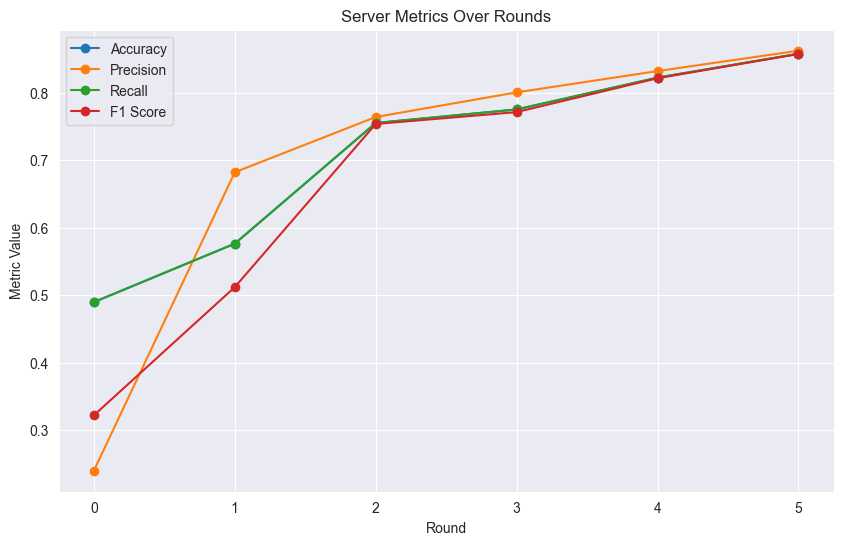

In [8]:
print("Plotting Metrics Over Rounds...")
plot_metrics_over_rounds()

In [9]:
# Visualization 2: Confusion Matrix
def plot_confusion_matrix(round_index=0):
    labels = data["server_results"][round_index]["server_metrics"]["labels"]
    predictions = data["server_results"][round_index]["server_metrics"]["predictions"]

    cm = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Round {round_index}")
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, f"Confusion Matrix - Round {round_index}"+".png"))
    plt.show()

Plotting Confusion Matrix for Round 0...


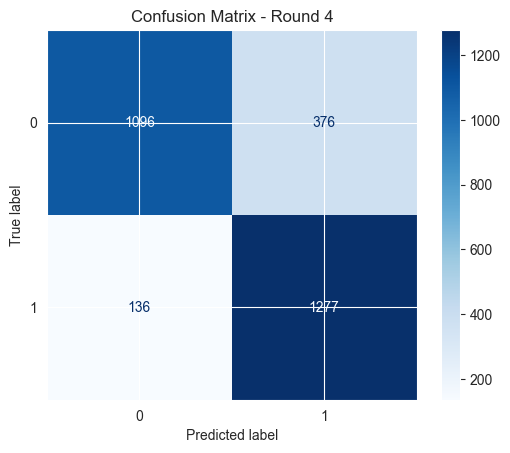

In [10]:
print("Plotting Confusion Matrix for Round 0...")
plot_confusion_matrix(round_index=4)

In [41]:
# Visualization 3: Client Metrics Variance
def plot_client_metrics_variance():
    rounds = list(data["client_results"].keys())
    clients = list(data["client_results"]["1"].keys())  # Assuming all rounds have the same clients

    client_accuracy = {client: [] for client in clients}
    for round_num in rounds:
        for client in clients:
            client_data = data["client_results"][round_num][client]
            client_accuracy[client].append(client_data["accuracy"])

    plt.figure(figsize=(10, 6))
    for client, accuracies in client_accuracy.items():
        plt.plot(rounds, accuracies, label=f"Client {client}")
    plt.title("Client Accuracy Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, "Client Accuracy Over Rounds.png"))
    plt.show()

Plotting Client Metrics Variance...


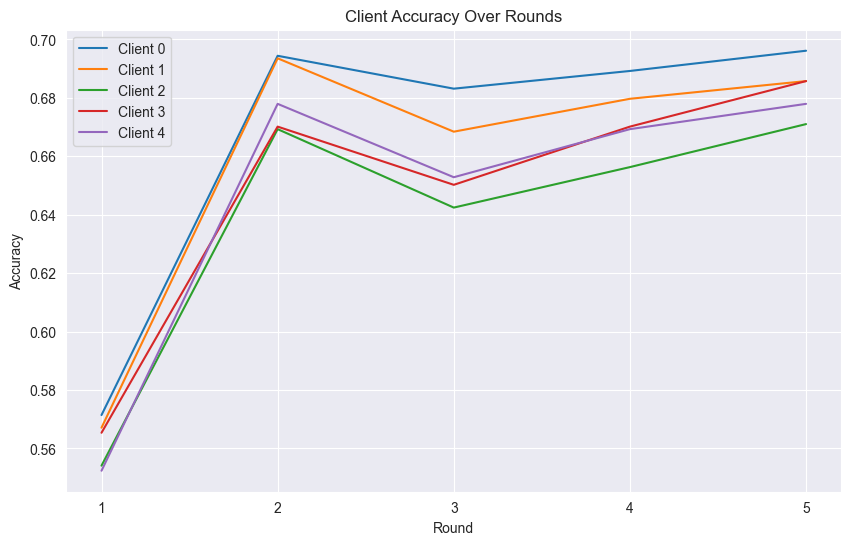

In [42]:
print("Plotting Client Metrics Variance...")
plot_client_metrics_variance()

In [43]:
# Visualization 4: Client Contributions
def plot_client_contributions():
    rounds = list(data["client_results"].keys())
    clients = list(data["client_results"]["1"].keys())

    contributions = {client: 0 for client in clients}
    for round_num in rounds:
        for client in clients:
            contributions[client] += data["client_results"][round_num][client]["num_samples"]

    plt.figure(figsize=(10, 6))
    plt.bar(contributions.keys(), contributions.values())
    plt.title("Client Contributions")
    plt.xlabel("Client ID")
    plt.ylabel("Number of Samples")
    plt.grid(True)
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, "Client Contributions.png"))
    plt.show()

Plotting Client Contributions...


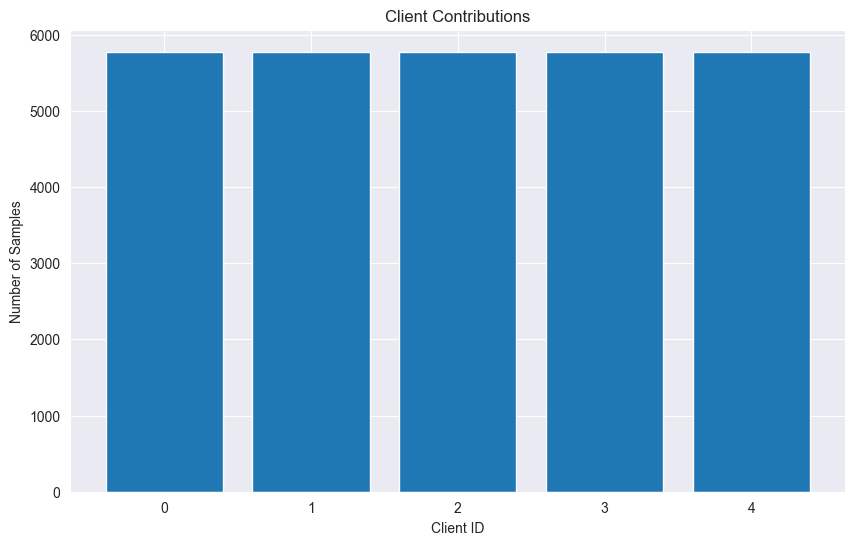

In [44]:
print("Plotting Client Contributions...")
plot_client_contributions()

In [45]:
# Visualization 4: Misclassification Heatmap
def plot_misclassification_heatmap(round_index=0):
    labels = data["server_results"][round_index]["server_metrics"]["labels"]
    predictions = data["server_results"][round_index]["server_metrics"]["predictions"]

    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Misclassification Heatmap - Round {round_index}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, f"Misclassification Heatmap - Round {round_index}"+".png"))
    plt.show()

Plotting Misclassification Heatmap for Round 0...


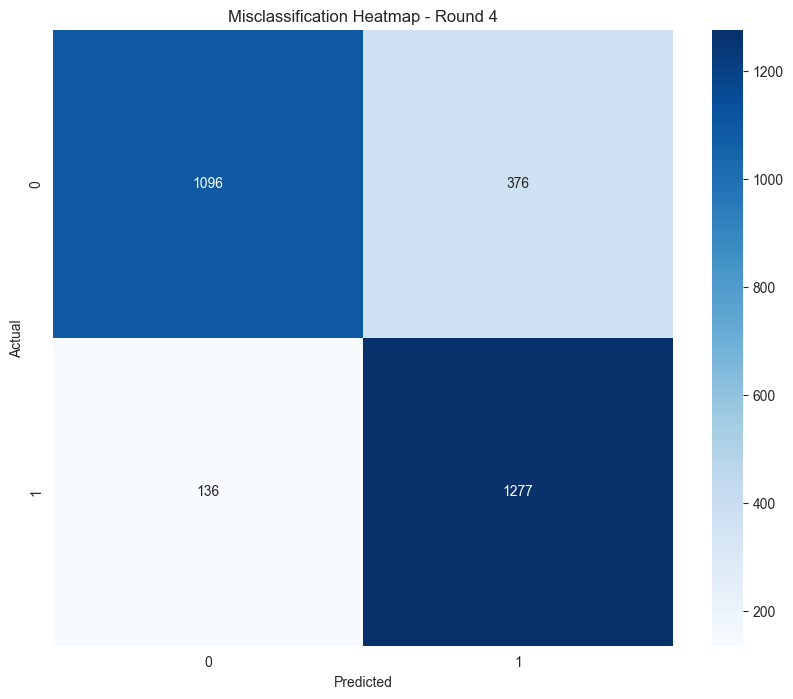

In [46]:
print("Plotting Misclassification Heatmap for Round 0...")
plot_misclassification_heatmap(round_index=4)

In [47]:
def plot_client_labelwise_contributions(data):
    """
    Visualize client contributions with label-wise data distribution.

    Args:
        data (dict): The experiment JSON data containing client_results.
    """
    rounds = list(data["client_results"].keys())
    clients = list(data["client_results"]["1"].keys())  # Assuming all rounds have the same clients
    label_counts = {}

    # Initialize label counts for each client
    for client in clients:
        label_counts[client] = {}

    # Aggregate label-wise counts across all rounds
    for round_num in rounds:
        for client in clients:
            client_data = data["client_results"][round_num][client]
            labels = client_data["labels"]
            for label in labels:
                if label not in label_counts[client]:
                    label_counts[client][label] = 0
                label_counts[client][label] += 1

    # Prepare data for stacked bar chart
    clients_sorted = sorted(label_counts.keys())
    labels = sorted({label for client in label_counts for label in label_counts[client]})
    bar_data = {label: [label_counts[client].get(label, 0) for client in clients_sorted] for label in labels}

    # Plot stacked bar chart
    x = np.arange(len(clients_sorted))
    bar_width = 0.6
    bottom = np.zeros(len(clients_sorted))

    plt.figure(figsize=(12, 8))
    for label in labels:
        plt.bar(x, bar_data[label], width=bar_width, bottom=bottom, label=f"Label {label}")
        bottom += np.array(bar_data[label])

    plt.xticks(x, clients_sorted, rotation=45)
    plt.xlabel("Client ID")
    plt.ylabel("Number of Samples")
    plt.title("Label-wise Data Distribution Across Clients")
    plt.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis="y")
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, "Label-wise Data Distribution Across Clients.png"))
    plt.show()

Plotting Label-wise Data Distribution Across Clients...


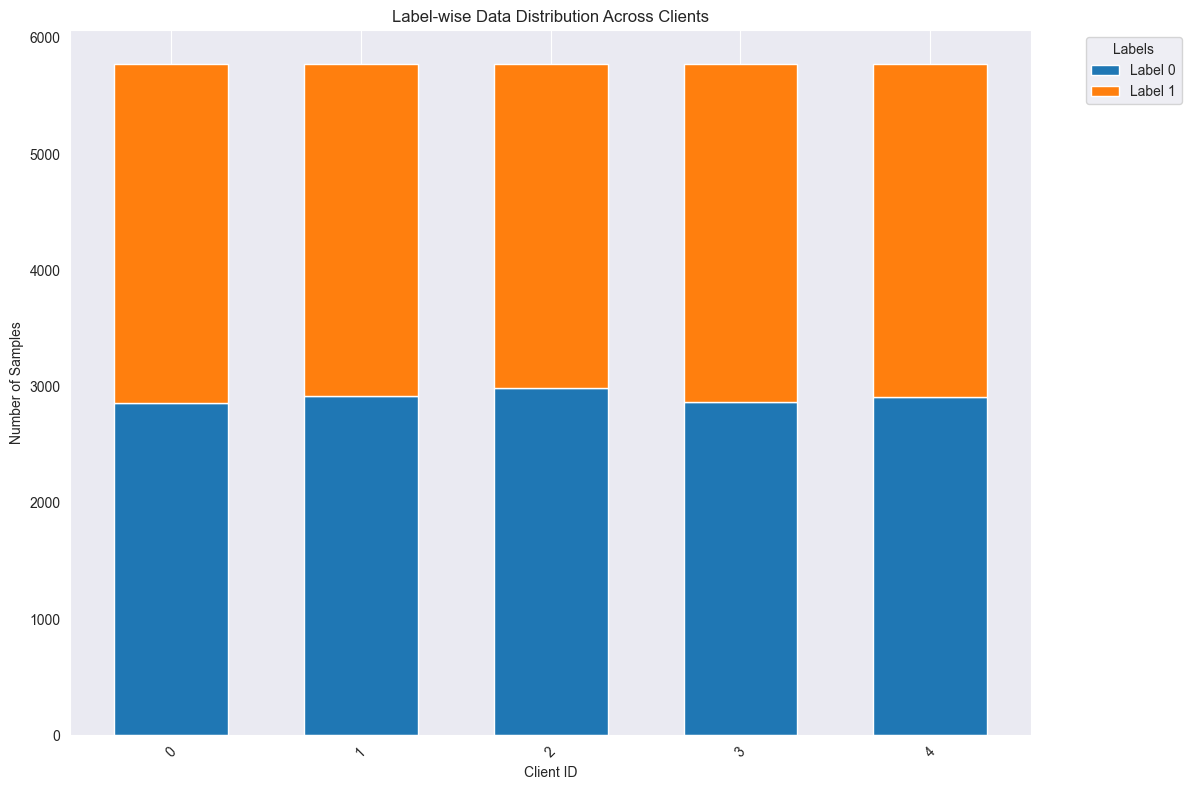

In [48]:
print("Plotting Label-wise Data Distribution Across Clients...")
plot_client_labelwise_contributions(data)